In [72]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')                    
sns.set_style({'axes.grid':False}) 
%matplotlib inline

from sklearn.linear_model import LinearRegression, HuberRegressor


train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)

In [ ]:
### Reference
#https://www.kaggle.com/vikassingh1996/
#comprehensive-data-preprocessing-and-modeling

# 1.0 Our Data

In [73]:
print('Dimensions of train data:', train.shape)
print('Dimensions of test data:', test.shape)

Dimensions of train data: (1460, 80)
Dimensions of test data: (1459, 79)


### 1.1 Looking at the column values in the train dataset

In [74]:
train.columns.values

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDriv

### 1.2 Isolating the Numerical variables 

In [75]:
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [76]:
num_housing = train.select_dtypes(include = ['int64', 'float64'])
display(num_housing.head())
display(num_housing.columns.values)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'], dtype=object)

# 2.0  Relationships

In [77]:
train.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'BedroomAbvGr',
               'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'FullBath', 'GarageCars', 'HalfBath',
               'KitchenAbvGr' 
             ]] = train.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'BedroomAbvGr',
               'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'FullBath', 'GarageCars', 'HalfBath',
               'KitchenAbvGr' 
                               ]].astype('object')

### 2.1 Correlation heatmap for all Continuous variables

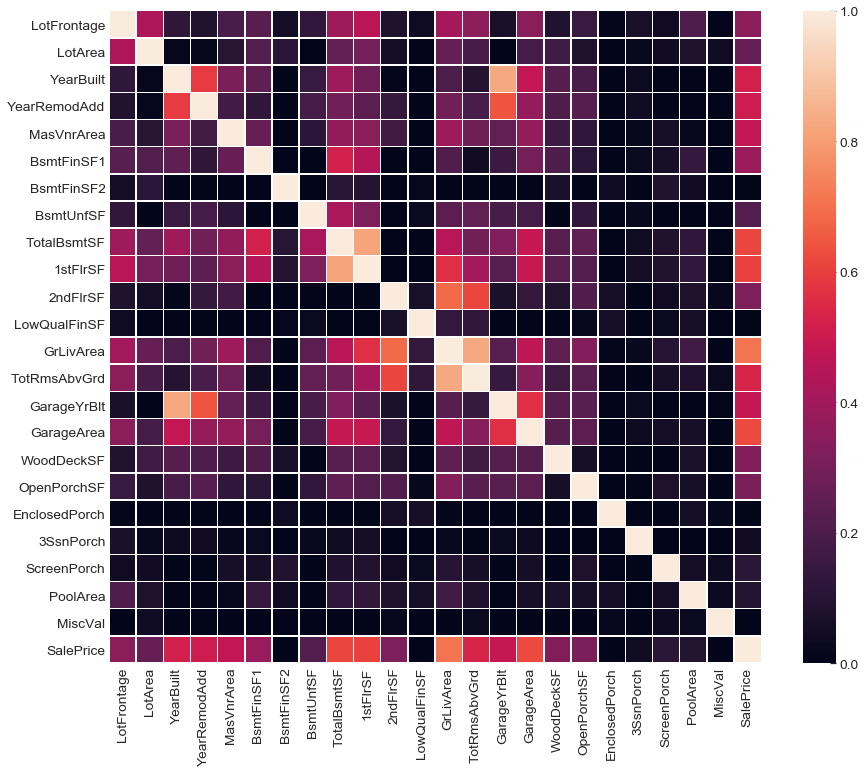

In [78]:
corr = train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1, square=True)

### 2.2 Top 10 Correlations

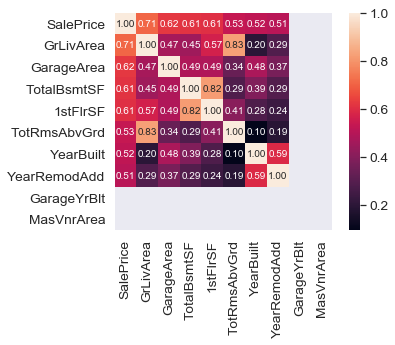

In [79]:
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Highest Correlations seem to be: 
   - Overall Quality
   - Great Living Area
   - Garage Cars
   - Garage Area
   - Total Basement SF
   - First Floor SF
   - Full Bathrooms
   - Total Rooms above ground
   - Year Built

# 3.0 Checking Assumptions: Linearity

#### 1stFlrSF vs. Sale Price

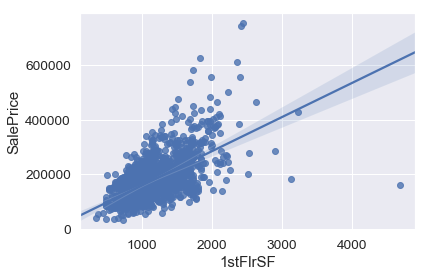

In [80]:
##### Eliminating Zero Values

sns.regplot(x=train["1stFlrSF"], y=train["SalePrice"])

##### GrLivArea vs. Sale Price

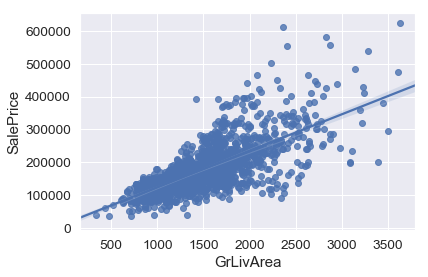

In [81]:
## Removing Outliers at a threshold 
thresholdHigh = 4000
train = train[train.loc[:,'GrLivArea'] < thresholdHigh]


sns.regplot(x=train["GrLivArea"], y=train["SalePrice"])


##### Garage Area vs. SalePrice

There was a very large number of 0 observations, Meaning that there is no garage. I eliminated these because they do neither add nor subtract anything from the analysis.

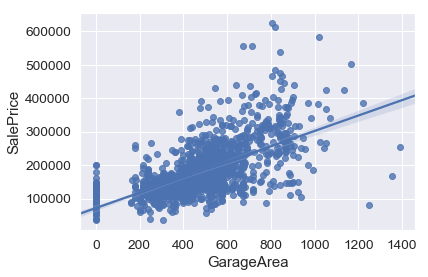

In [82]:
### Remove 0 values

sns.regplot(x=train["GarageArea"], y=train["SalePrice"])

##### Total Basement SF vs. SalePrice

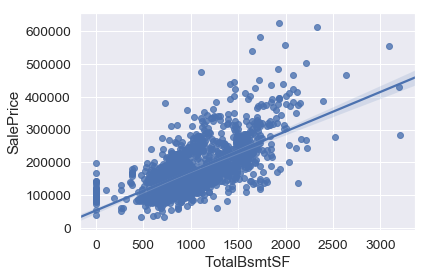

In [83]:
sns.regplot(x=train["TotalBsmtSF"], y=train["SalePrice"])

##### First Floor SF vs. SalePrice

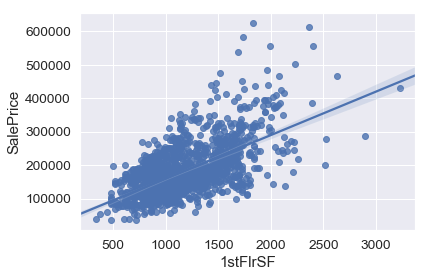

In [84]:
sns.regplot(x=train["1stFlrSF"], y=train["SalePrice"])

##### Total Rooms Above Ground vs. SalePrice

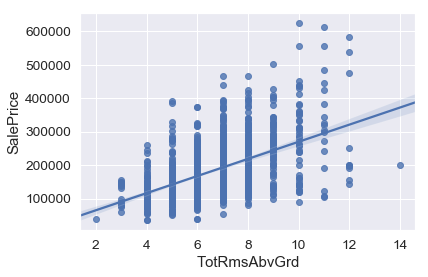

In [85]:
sns.regplot(x=train['TotRmsAbvGrd'], y=train["SalePrice"])

##### Year Built vs. Sale Price

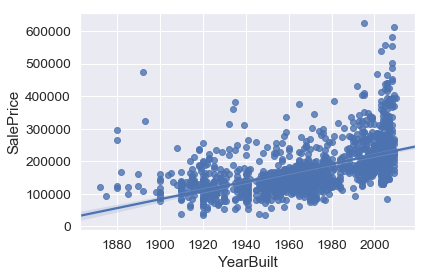

In [86]:
sns.regplot(x=train['YearBuilt'], y=train["SalePrice"])

##### Year Remod Added vs. Sale Price

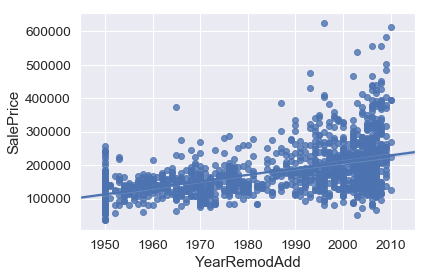

In [87]:
sns.regplot(x=train['YearRemodAdd'], y=train["SalePrice"])

## 3.1 Missing Variables

In [88]:
###### Combining Data
ntrain = train.shape[0]
ntest = test.shape[0]

housing_merge = pd.concat((train, test)).reset_index(drop=True)

y_house = pd.DataFrame(train.SalePrice.values)

housing_merge.drop(['SalePrice'], axis=1, inplace=True)

print("Train data size is : {}".format(train.shape))
print("Test data size is : {}".format(test.shape))
print("Combined dataset size is : {}".format(housing_merge.shape))

Train data size is : (1456, 80)
Test data size is : (1459, 79)
Combined dataset size is : (2915, 79)


/Users/lauraelliott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [89]:
housing_merge.isna().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley            2717
BedroomAbvGr        0
BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFinType1       79
BsmtFinType2       80
BsmtFullBath        2
BsmtHalfBath        2
BsmtQual           81
BsmtUnfSF           1
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence            2345
FireplaceQu      1420
Fireplaces          0
Foundation          0
FullBath            0
                 ... 
LotFrontage       486
LotShape            0
LowQualFinSF        0
MSSubClass          0
MSZoning            4
MasVnrArea         23
MasVnrType         24
MiscFeature      2810
MiscVal             0
MoSold              0
Neighborhood        0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PavedDrive

In [90]:
y_house.head()

,0
0,208500
1,181500
2,223500
3,140000
4,250000


#### Converting categorical variables in the merged dataset

In [91]:
housing_merge.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'BedroomAbvGr',
               'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'FullBath', 'GarageCars', 'HalfBath',
               'KitchenAbvGr' 
             ]] = housing_merge.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'BedroomAbvGr',
               'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'FullBath', 'GarageCars', 'HalfBath',
               'KitchenAbvGr' 
                               ]].astype('object')

#### Creating new Continuous variable Total SF

In [92]:
#### Creating new Continuous variable Total SF
housing_merge['TotalSF']= housing_merge['TotalBsmtSF'] + housing_merge['1stFlrSF'] + housing_merge['2ndFlrSF']

housing_merge.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,0,Pave,8,856.0,AllPub,0,2003,2003,2008,2566.0
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0,Pave,6,1262.0,AllPub,298,1976,1976,2007,2524.0
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0,Pave,6,920.0,AllPub,0,2001,2002,2008,2706.0
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0,Pave,7,756.0,AllPub,0,1915,1970,2006,2473.0
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0,Pave,9,1145.0,AllPub,192,2000,2000,2008,3343.0


## 3.2 Imputation

#### Imputing mode for MSZoning, Electrical, Utilites, Exterior1st/2nd, KitchenQual, Functional, SaleType, TotalSF

In [93]:
## MSZoning
housing_merge['MSZoning']=housing_merge['MSZoning'].fillna('RL')
print('MSZoning unique Values: ', housing_merge['MSZoning'].unique())

MSZoning unique Values:  ['RL' 'RM' 'C (all)' 'FV' 'RH']


In [94]:
## Electrical
housing_merge['Electrical']=housing_merge['Electrical'].fillna('SBrkr')
print('Electrical unique values: ', housing_merge['Electrical'].unique())

Electrical unique values:  ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']


In [95]:
## Utilities
housing_merge['Utilities']=housing_merge['Utilities'].fillna('AllPub')
print('Utility unique values: ', housing_merge['Utilities'].unique())

Utility unique values:  ['AllPub' 'NoSeWa']


In [96]:
## Exterior1st
housing_merge['Exterior1st']=housing_merge['Exterior1st'].fillna('VinylSd')
print('Exterior1st unique values: ', housing_merge['Exterior1st'].unique())

Exterior1st unique values:  ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']


In [97]:
## Exterior2nd
housing_merge['Exterior2nd']=housing_merge['Exterior2nd'].fillna('VinylSd')
print('Exterior2nd unique values: ', housing_merge['Exterior2nd'].unique())

Exterior2nd unique values:  ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']


In [98]:

## KitchenQual
housing_merge['KitchenQual']=housing_merge['KitchenQual'].fillna('TA')
print('Kitchen Quality unique values: ', housing_merge['KitchenQual'].unique())

Kitchen Quality unique values:  ['Gd' 'TA' 'Ex' 'Fa']


In [99]:
#Functional
housing_merge['Functional']=housing_merge['Functional'].fillna('Typ')
print('Functional unique values: ', housing_merge['Functional'].unique())

Functional unique values:  ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']


In [100]:
##SaleType
housing_merge['SaleType']=housing_merge['SaleType'].fillna('WD')
print('SaleType unique values: ', housing_merge['SaleType'].unique())


SaleType unique values:  ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']


  #### Imputing mean for Lot Frontage,  MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, GarageArea

In [101]:
# LotFrontage
housing_merge['LotFrontage'].fillna(housing_merge['LotFrontage'].mean(), inplace=True)
print('LotFrontage missing:', housing_merge['LotFrontage'].isna().sum())

LotFrontage missing: 0


In [102]:

# MasVnrArea
housing_merge['MasVnrArea'].fillna(housing_merge['MasVnrArea'].mean(), inplace=True)
print('MasVnrArea missing:', housing_merge['MasVnrArea'].isna().sum())

MasVnrArea missing: 0


In [103]:
# BsmtFinSF1
housing_merge['BsmtFinSF1'].fillna(housing_merge['BsmtFinSF1'].mean(), inplace=True)
print('BsmtFinSF1 missing:', housing_merge['BsmtFinSF1'].isna().sum())

BsmtFinSF1 missing: 0


In [104]:
# BsmtFinSF2
housing_merge['BsmtFinSF2'].fillna(housing_merge['BsmtFinSF2'].mean(), inplace=True)
print('BsmtFinSF2 missing:', housing_merge['BsmtFinSF2'].isna().sum())

BsmtFinSF2 missing: 0


In [105]:
# BsmtUnfSF
housing_merge['BsmtUnfSF'].fillna(housing_merge['BsmtUnfSF'].mean(), inplace=True)
print('BsmtunfSF missing:', housing_merge['BsmtUnfSF'].isna().sum())

BsmtunfSF missing: 0


In [106]:
# TotalBasmtSF
housing_merge['TotalBsmtSF'].fillna(housing_merge['TotalBsmtSF'].mean(), inplace=True)
print('TotalBsmtSF missing:', housing_merge['TotalBsmtSF'].isna().sum())

TotalBsmtSF missing: 0


In [107]:
# TotalSf
housing_merge['TotalSF'].fillna(housing_merge['TotalSF'].mean(), inplace=True)
print('TotalSF missing:', housing_merge['TotalSF'].isna().sum())

TotalSF missing: 0


In [108]:
# GarageArea
housing_merge['GarageArea'].fillna(housing_merge['GarageArea'].mean(), inplace=True)
print('GarageArea missing:', housing_merge['GarageArea'].isna().sum())

GarageArea missing: 0


#### Imputing median for Bsmt FullBath, BsmtHalfBath, GarageCars, GarageYrBlt

In [109]:
##BedroomAbvGr
housing_merge['BedroomAbvGr'].fillna(housing_merge['BedroomAbvGr'].median(),inplace = True)
print('BedroomAbvGr missing: ', housing_merge['BedroomAbvGr'].isna().sum())

BedroomAbvGr missing:  0


In [110]:
# BsmtFullBath
housing_merge['BsmtFullBath'].fillna(housing_merge['BsmtFullBath'].median(), inplace=True)
print('BsmtFullBath missing:', housing_merge['BsmtFullBath'].isna().sum())

BsmtFullBath missing: 0


In [111]:
#BsmtHalfBath
housing_merge['BsmtHalfBath'].fillna(housing_merge['BsmtHalfBath'].median(), inplace=True)
print('BsmtHalfBath missing:', housing_merge['BsmtHalfBath'].isna().sum())

BsmtHalfBath missing: 0


In [112]:
#Garage Cars
housing_merge['GarageCars'].fillna(housing_merge['GarageCars'].median(), inplace=True)
print('GarageCars missing:', housing_merge['GarageCars'].isna().sum())

GarageCars missing: 0


In [113]:
#GarageYrBlt
housing_merge['GarageYrBlt'].fillna(housing_merge['GarageYrBlt'].median(), inplace=True)
print('GarageYrBlt missing:', housing_merge['GarageYrBlt'].isna().sum())

GarageYrBlt missing: 0


In [114]:
#Fireplaces
housing_merge['Fireplaces'].fillna(housing_merge['Fireplaces'].median(), inplace=True)
print('Fireplaces missing:', housing_merge['Fireplaces'].isna().sum())

Fireplaces missing: 0


In [115]:
#FullBath
housing_merge['FullBath'].fillna(housing_merge['FullBath'].median(), inplace=True)
print('FullBath missing:', housing_merge['FullBath'].isna().sum())

FullBath missing: 0


In [116]:
#HalfBath 
housing_merge['HalfBath'].fillna(housing_merge['HalfBath'].median(), inplace=True)
print('HalfBath  missing:', housing_merge['HalfBath'].isna().sum())

HalfBath  missing: 0


In [117]:

#KitchenAbvGr 
housing_merge['KitchenAbvGr'].fillna(housing_merge['KitchenAbvGr'].median(), inplace=True)
print('KitchenAbvGr  missing:', housing_merge['KitchenAbvGr'].isna().sum())

KitchenAbvGr  missing: 0


In [118]:
#MSSubClass 
housing_merge['MSSubClass'].fillna(housing_merge['MSSubClass'].median(), inplace=True)
print('MSSubClass  missing:', housing_merge['MSSubClass'].isna().sum())

MSSubClass  missing: 0


In [119]:
#MoSold 
housing_merge['MoSold'].fillna(housing_merge['MoSold'].median(), inplace=True)
print('MoSold missing:', housing_merge['MoSold'].isna().sum())

MoSold missing: 0


In [120]:
#OverallCond 
housing_merge['OverallCond'].fillna(housing_merge['OverallCond'].median(), inplace=True)
print('OverallCond missing:', housing_merge['OverallCond'].isna().sum())

OverallCond missing: 0


In [121]:
#OverallQual
housing_merge['OverallQual'].fillna(housing_merge['OverallQual'].median(), inplace=True)
print('OverallQual missing:', housing_merge['OverallQual'].isna().sum())

OverallQual missing: 0


In [122]:
#YrSold
housing_merge['YrSold'].fillna(housing_merge['YrSold'].median(), inplace=True)
print('YrSold missing:', housing_merge['YrSold'].isna().sum())

YrSold missing: 0


#### Imputing 'None' for missing values where NaN is meaningful, i.e. PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageCOnd, GarageFinish, GarageQual, BsmtFinType2, BsmtExposure, BsmtQual, BsmtCond, BsmtFinType1, MasVnrType

In [123]:
impute_none = housing_merge.loc[:, ['PoolQC','MiscFeature','Alley', 'Fence', 'FireplaceQu', 
                                    'GarageType', 'GarageCond','GarageFinish','GarageQual',
                                    'BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1',
                                    'MasVnrType']]
for i in impute_none.columns:
    housing_merge[i].fillna('None', inplace = True)

In [124]:
#Check

missing_columns = housing_merge.columns[housing_merge.isnull().any()].values
missing_columns = len(housing_merge) - housing_merge.loc[:, np.sum(housing_merge.isnull())>0].count()
missing_columns

Series([], dtype: int64)

In [125]:
housing_merge.dtypes

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
Alley             object
BedroomAbvGr       int64
BldgType          object
BsmtCond          object
BsmtExposure      object
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFinType1      object
BsmtFinType2      object
BsmtFullBath     float64
BsmtHalfBath     float64
BsmtQual          object
BsmtUnfSF        float64
CentralAir        object
Condition1        object
Condition2        object
Electrical        object
EnclosedPorch      int64
ExterCond         object
ExterQual         object
Exterior1st       object
Exterior2nd       object
Fence             object
FireplaceQu       object
Fireplaces         int64
Foundation        object
FullBath           int64
                  ...   
LotShape          object
LowQualFinSF       int64
MSSubClass         int64
MSZoning          object
MasVnrArea       float64
MasVnrType        object
MiscFeature       object
MiscVal            int64
MoSold             int64


In [126]:
housing_merge.isna().sum()

1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
Alley            0
BedroomAbvGr     0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtFinType1     0
BsmtFinType2     0
BsmtFullBath     0
BsmtHalfBath     0
BsmtQual         0
BsmtUnfSF        0
CentralAir       0
Condition1       0
Condition2       0
Electrical       0
EnclosedPorch    0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
Fence            0
FireplaceQu      0
Fireplaces       0
Foundation       0
FullBath         0
                ..
LotShape         0
LowQualFinSF     0
MSSubClass       0
MSZoning         0
MasVnrArea       0
MasVnrType       0
MiscFeature      0
MiscVal          0
MoSold           0
Neighborhood     0
OpenPorchSF      0
OverallCond      0
OverallQual      0
PavedDrive       0
PoolArea         0
PoolQC           0
RoofMatl         0
RoofStyle        0
SaleCondition    0
SaleType         0
ScreenPorch      0
Street      

# 4.0 Checking Assumptions: Normality

#### 4.1 Normality and Transformation of Dependent Variable Sale Price
Skewness rule of thumb:
if skewness < -1 or greater than 1, the distribution is highley skewed

if the skewness is between +/- 1 and +/- 0.5 the distribution is moderately skewed

if the skewness is between -0.5 and 0.5 the distribution is approximately symmetric

In [127]:
print("Skewness: %f" % y_house.skew()) ## the closer to 0, the more normal
print("Kurtosis: %f" % y_house.kurt())

Skewness: 1.565959
Kurtosis: 3.885283


<Figure size 720x432 with 0 Axes>

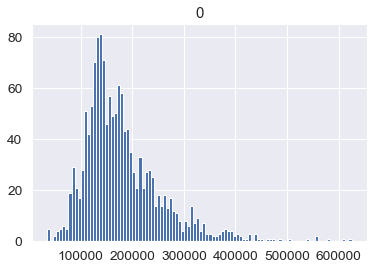

In [128]:
fig = plt.figure(figsize=(10,6))
y_house.hist(bins=100)
plt.show()

####  Transform Sale Price

In [129]:
y_house = np.log1p(y_house)

In [130]:
print("Skewness: %f" % y_house.skew())
print("Kurtosis: %f" % y_house.kurt())


Skewness: 0.065460
Kurtosis: 0.666423


<Figure size 720x432 with 0 Axes>

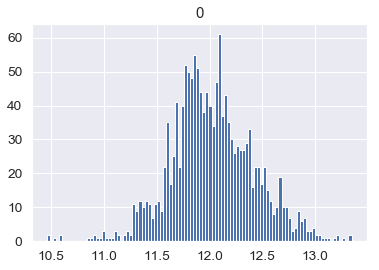

In [131]:
fig = plt.figure(figsize=(10,6))
y_house.hist(bins=100)
plt.show()

#### 4.2 Normality and Transformation of Explanatory Variables

In [132]:
num_housing_merge = housing_merge.select_dtypes(include = ['int64', 'float64'])
display(num_housing_merge.head())
display(num_housing_merge.columns.values)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,7,0,0,8,856.0,0,2003,2003,2008,2566.0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,6,0,0,6,1262.0,298,1976,1976,2007,2524.0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,7,0,0,6,920.0,0,2001,2002,2008,2706.0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,7,0,0,7,756.0,0,1915,1970,2006,2473.0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,8,0,0,9,1145.0,192,2000,2000,2008,3343.0


array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea',
       'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF',
       'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch',
       'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold', 'TotalSF'], dtype=object)

#### Skewness explanatory variables

In [133]:
skew_housing_merge = pd.DataFrame(data = housing_merge.select_dtypes(include = ['int64', 'float64'
]).skew(), columns=['Skewness'])


skew_housing_sort = skew_housing_merge.sort_values(ascending = False, by ='Skewness')
skew_housing_sort

,Skewness
MiscVal,21.943440
PoolArea,18.711459
LotArea,13.130516
LowQualFinSF,12.086535
3SsnPorch,11.373947
KitchenAbvGr,4.301059
BsmtFinSF2,4.144886
EnclosedPorch,4.002856
ScreenPorch,3.945539
BsmtHalfBath,3.944922


#### Transformation
Before

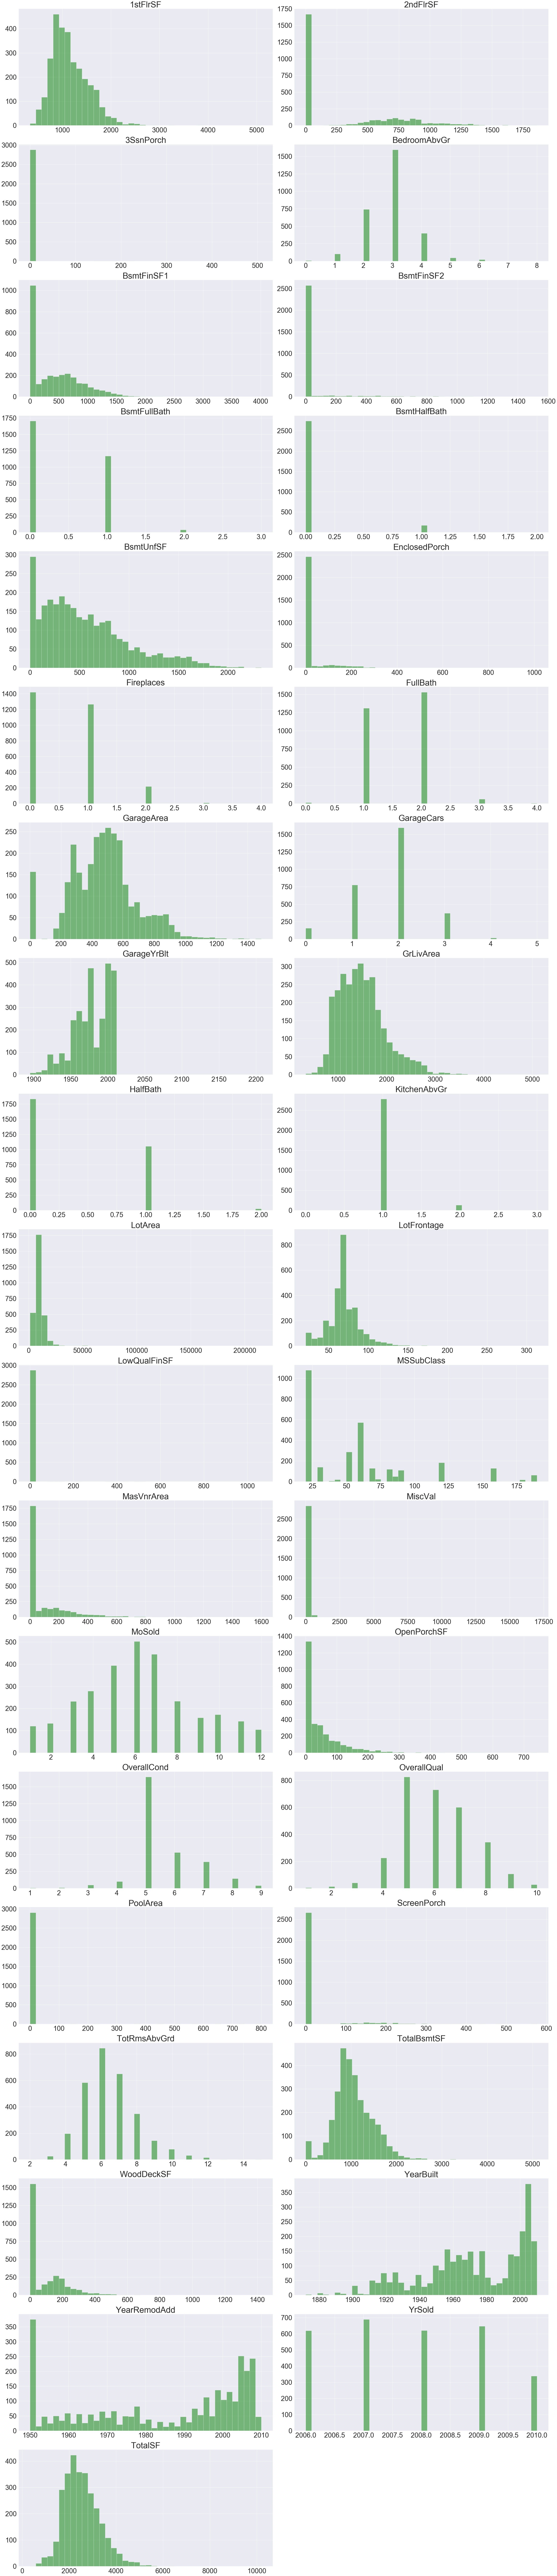

In [134]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=40,ax=ax,color = 'green',alpha=0.5, figsize = (40, 200))
        ax.set_title(var_name, fontsize = 43)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 35)
        ax.tick_params(axis = 'both', which = 'minor', labelsize = 35)
        ax.set_xlabel('')
    fig.tight_layout(rect = [0, 0.03, 1, 0.95])  # Improves appearance a bit.
    plt.show()
    
draw_histograms(num_housing_merge, num_housing_merge.columns, 19, 2)

Transform

In [135]:
## non normal data
housing_merged_skewed = np.log1p(num_housing_merge[num_housing_merge.skew()[num_housing_merge.skew() > 0.5].index])

## normal data
housing_merged_normal = num_housing_merge[num_housing_merge.skew()[num_housing_merge.skew() < 0.5].index]

## combining 
housing_merged_num_all = pd.concat([housing_merged_skewed, housing_merged_normal], axis = 1)


## Updating numerical Data
num_housing_merge.update(housing_merged_num_all)

#### Updating combined data
housing_merge.update(num_housing_merge)

/Users/lauraelliott/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


After

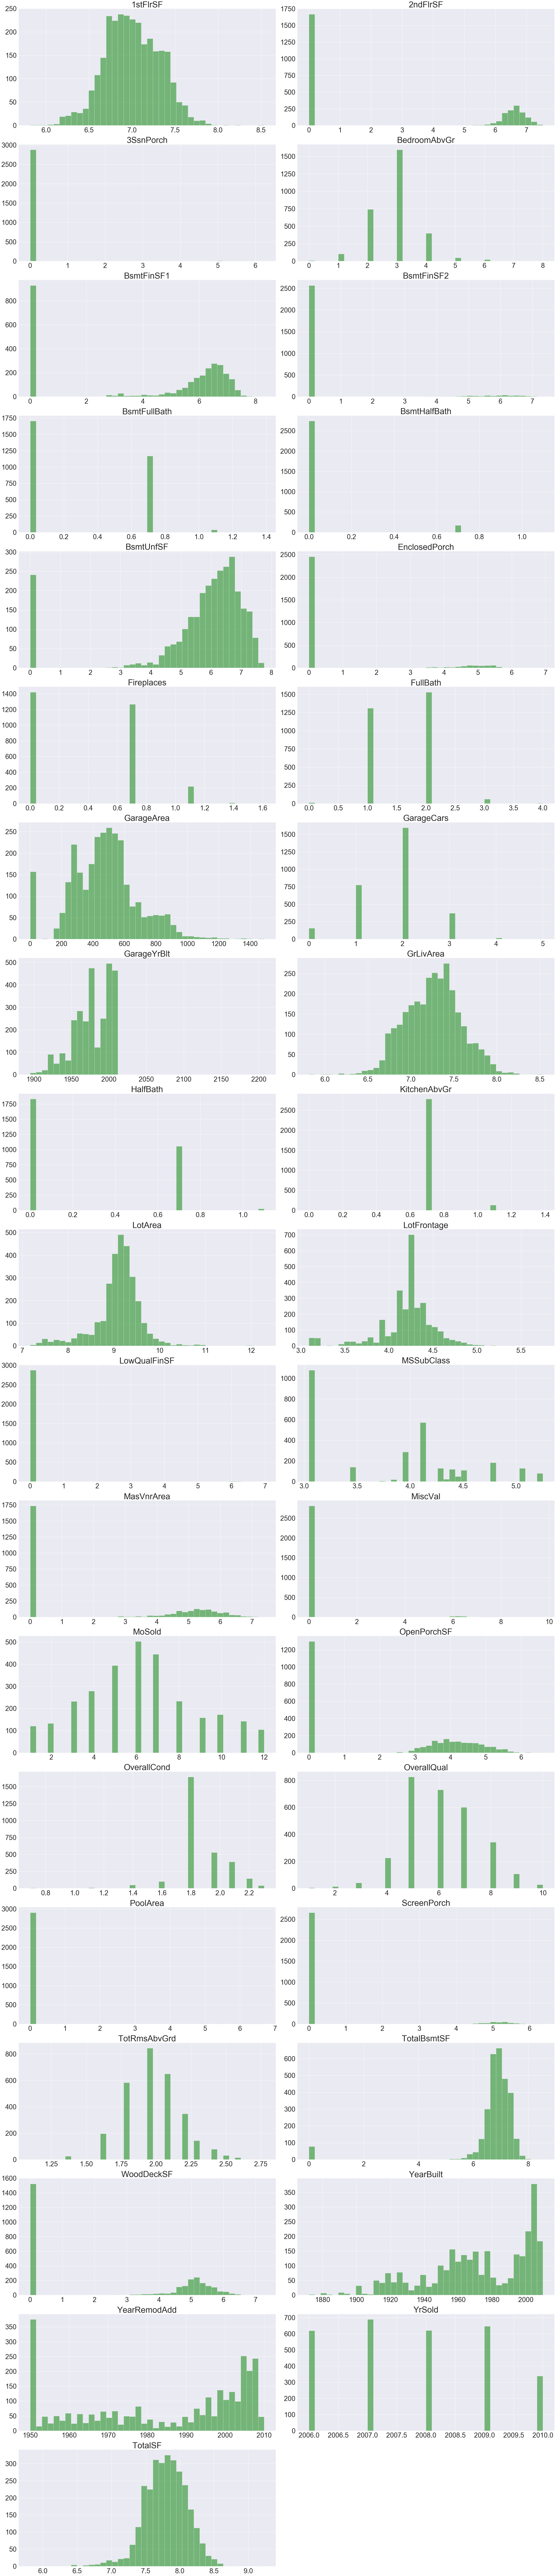

In [136]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=40,ax=ax,color = 'green',alpha=0.5, figsize = (40, 200))
        ax.set_title(var_name, fontsize = 43)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 35)
        ax.tick_params(axis = 'both', which = 'minor', labelsize = 35)
        ax.set_xlabel('')
    fig.tight_layout(rect = [0, 0.03, 1, 0.95])  # Improves appearance a bit.
    plt.show()
    
draw_histograms(num_housing_merge, num_housing_merge.columns, 19, 2)

In [137]:
skew_housing_merge = pd.DataFrame(data = num_housing_merge.select_dtypes(include = ['int64', 'float64'
]).skew(), columns=['Skewness'])

skew_housing_sort = skew_housing_merge.sort_values(ascending = False, by ='Skewness')
skew_housing_sort

,Skewness
PoolArea,16.340597
3SsnPorch,8.823517
LowQualFinSF,8.555990
MiscVal,5.212708
BsmtHalfBath,3.786964
KitchenAbvGr,3.519226
ScreenPorch,2.944749
BsmtFinSF2,2.457331
EnclosedPorch,1.959831
HalfBath,0.584940


## 5.0 Feature Engineering

### 5.1 Scaling Numerical Features

In [139]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

In [140]:
####Standardizing with Rubust Scaler
scaler = RobustScaler()

## creating scalar
scaler.fit(num_housing_merge)


## apply it to numerical data
housing_merged_scaled = scaler.transform(num_housing_merge)

In [141]:
##### Retrive column names

housing_merged_scaled = pd.DataFrame(data = housing_merged_scaled, columns
                                    = num_housing_merge.columns, index = num_housing_merge.index)

### 5.2 Categorical Features

#### Using Label Encoder to encode Categorical Values

In [142]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from numpy import array
from numpy import argmax 


#reference:https://www.kaggle.com/erick5/predicting-house-prices-with-machine-learning

cols = ('MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition','BedroomAbvGr','BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'FullBath', 'GarageCars', 'HalfBath',
       'KitchenAbvGr')


In [143]:
##### process and encode to make it easier for the machine learning algorithm
### to read cat var
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(housing_merge[c].values))
    housing_merge[c] = lbl.transform(list(housing_merge[c].values))
    
print('Shape housing_merge: {}'.format(housing_merge.shape))

Shape housing_merge: (2915, 80)


In [144]:
### hanging back to category

housing_merge[['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']] = housing_merge[['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']].astype('category')

In [145]:
housing_merge = pd.get_dummies(housing_merge, drop_first = True)

In [146]:
print(housing_merge.shape)

(2915, 301)


In [147]:
print(y_house.shape)

(1456, 1)


In [148]:
housing_train = pd.DataFrame(housing_merge.iloc[0:1456, :])
housing_test = pd.DataFrame(housing_merge.iloc[1456:,:])

y_train = pd.DataFrame( y_house)

In [149]:
housing_train.to_csv('housing_train.csv', index = False)
housing_test.to_csv('housing_test.csv', index = False)

y_train.to_csv('y_housing.csv', index = False)